Código tomado de https://github.com/puigalex/AMP-Tech/blob/master/Ep.10%20PCA.ipynb

In [ ]:
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

## [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en [Enlace web]

El plano de separación descrito anteriormente se obtuvo mediante el método de árbol multisuperficie (MSM-T) [K. P. Bennett, "Construcción de árboles de decisión mediante programación lineal". Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], un método de clasificación que utiliza programación lineal para construir un árbol de decisiones. Las características relevantes se seleccionaron mediante una búsqueda exhaustiva en el espacio de 1-4 características y 1-3 planos de separación.

El programa lineal real utilizado para obtener el plano de separación en el espacio tridimensional es el que se describe en: [K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34].

Información de atributo:

- número de identificación
- Diagnóstico (M = maligno, B = benigno)
- (3-32) Se calculan diez características de valor real para cada núcleo celular:

  a. radio (media de las distancias desde el centro hasta los puntos del perímetro)

  b. textura (desviación estándar de los valores de la escala de grises)

  c. perímetro

  d. área

  e. suavidad (variación local en longitudes de radio)

  f. compacidad (perímetro ^ 2 / área - 1.0)

  g. concavidad (severidad de las porciones cóncavas del contorno)

  h. puntos cóncavos (número de porciones cóncavas del contorno)

  i. simetría
  
  j. dimensión fractal ("aproximación de la línea de costa" - 1)


Queremos ver los datos por cuantas caracteristicas esta compuesto

In [ ]:
cancer=load_breast_cancer()
cancer.feature_names.shape


(30,)

### Preparación de los datos

Se recomienda probar ceste ejercicio con StandardScaler, MinMaxScaler y sin ningun scaler, cual es la conclusión?


In [ ]:
escala=StandardScaler()

escalada=

Decimos que queremos 2 componentes, el de mayor varianza y el ortogonal

In [ ]:
pca=
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Queremos que haga una transformación, que reduzca de 30 a dos datos

In [ ]:
transformada=pca.transform(escalada)

Mirar la forma de nuestros datos iniciales
Y miriar los datos transformados

In [ ]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


##Visualización

Vamos a usar un metodo de la libreria [mglearn](https://github.com/amueller/mglearn/blob/master/mglearn/plot_helpers.py) podemos instalar la libreria con `!pip install mglearn` o en este caso solo copiamos el método que nos interesa.

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    based in https://github.com/amueller/mglearn/blob/master/mglearn/plot_helpers.py
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

Text(0, 0.5, 'PCA 2')

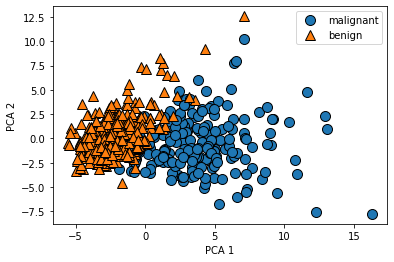

In [ ]:
#crear la grafica bidimensional con 2 componentes (revisar ayuda de discrete_scatter)
discrete_scatter(,,)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### 3D

Intentalo con 3 componentes

Se recomienda usar [plotly](https://plotly.com/python/pca-visualization/)


In [ ]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [ ]:
%matplotlib inline

In [ ]:
pca=PCA(n_components=3)
pca.fit(escalada)
transformada=pca.transform(escalada)
print('porcentaje de variación con 3 componentes: '+str(np.sum(pca.explained_variance_ratio_)*100))


porcentaje de variación con 3 componentes: 72.6363709089709


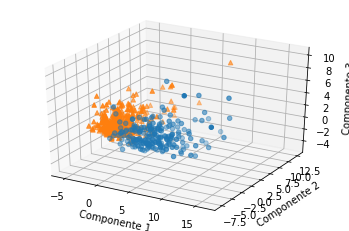

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#genera la grafica 3d plot con ax.scatter

intentemos utilizar [PLOTLY](https://plotly.com/python/pca-visualization/)


In [ ]:
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100


fig.show()

## Modelado
...Ahora intentemos realizar un modelo y probarlo para poder implementarlo...
